In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
from seaborn import pairplot


from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [461]:
data = pd.read_csv("C:\data\Heart_Disease_Prediction.csv")

In [462]:
print(data.shape)
(data.head())

(270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


                                       EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [464]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [465]:
###checking for missing values

data.isna().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [466]:
# count all values in name column


def categorical_valcount_hist(feature):
    
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

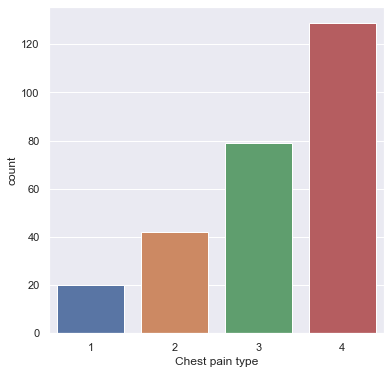

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [467]:
categorical_valcount_hist("Chest pain type")
data['Chest pain type'].value_counts()

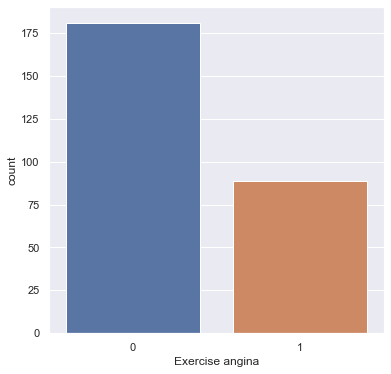

0    181
1     89
Name: Exercise angina, dtype: int64

In [468]:
categorical_valcount_hist("Exercise angina")
data['Exercise angina'].value_counts()

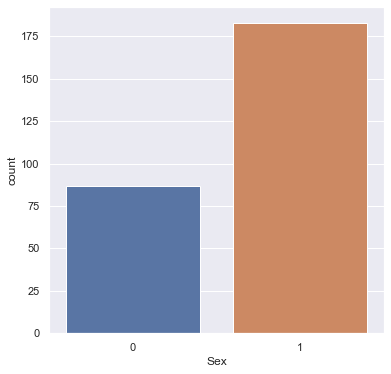

1    183
0     87
Name: Sex, dtype: int64

In [469]:
categorical_valcount_hist("Sex")
data['Sex'].value_counts()

In [470]:
print("number of NaN values for the column Sex :", data['Sex'].isnull().sum())
print("number of NaN values for the column FBS over 120 :", data['FBS over 120'].isnull().sum())
print("number of NaN values for the column Exercise angina :", data['Exercise angina'].isnull().sum())
print("number of NaN values for the column ST depression :", data['ST depression'].isnull().sum())
print("number of NaN values for the column Number of vessels fluro :", data['Number of vessels fluro'].isnull().sum())


number of NaN values for the column Sex : 0
number of NaN values for the column FBS over 120 : 0
number of NaN values for the column Exercise angina : 0
number of NaN values for the column ST depression : 0
number of NaN values for the column Number of vessels fluro : 0


In [471]:
mean=data['Sex'].mean()
data['Sex'].replace(np.nan,mean, inplace=True)

In [472]:
mean=data['FBS over 120'].mean()
data['FBS over 120'].replace(np.nan,mean, inplace=True)

In [473]:
mean=data['Exercise angina'].mean()
data['Exercise angina'].replace(np.nan,mean, inplace=True)

In [474]:
mean=data['ST depression'].mean()
data['ST depression'].replace(np.nan,mean, inplace=True)

In [475]:
mean=data['Number of vessels fluro'].mean()
data['Number of vessels fluro'].replace(np.nan,mean, inplace=True)

In [476]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [477]:
correlation = data.corr()
correlation

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


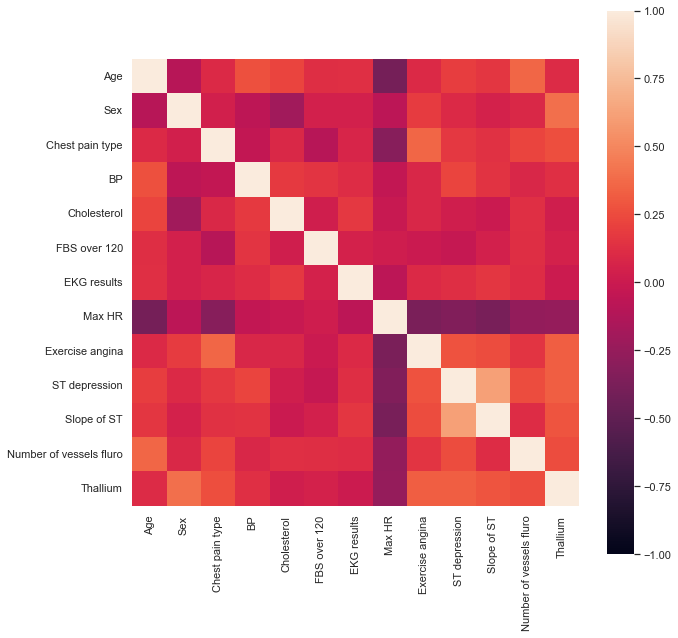

In [478]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,vmin=-1,square=True)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

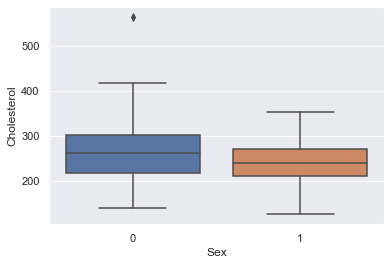

In [479]:
sns.boxplot(x='Sex', y='Cholesterol', data=data)

<AxesSubplot:xlabel='Heart Disease', ylabel='Cholesterol'>

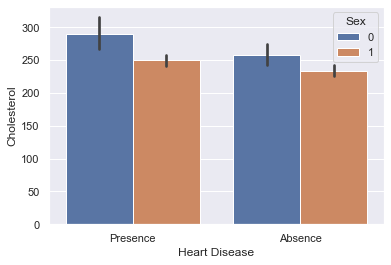

In [480]:
sns.barplot(data["Heart Disease"], data["Cholesterol"], hue = 'Sex', data=data)

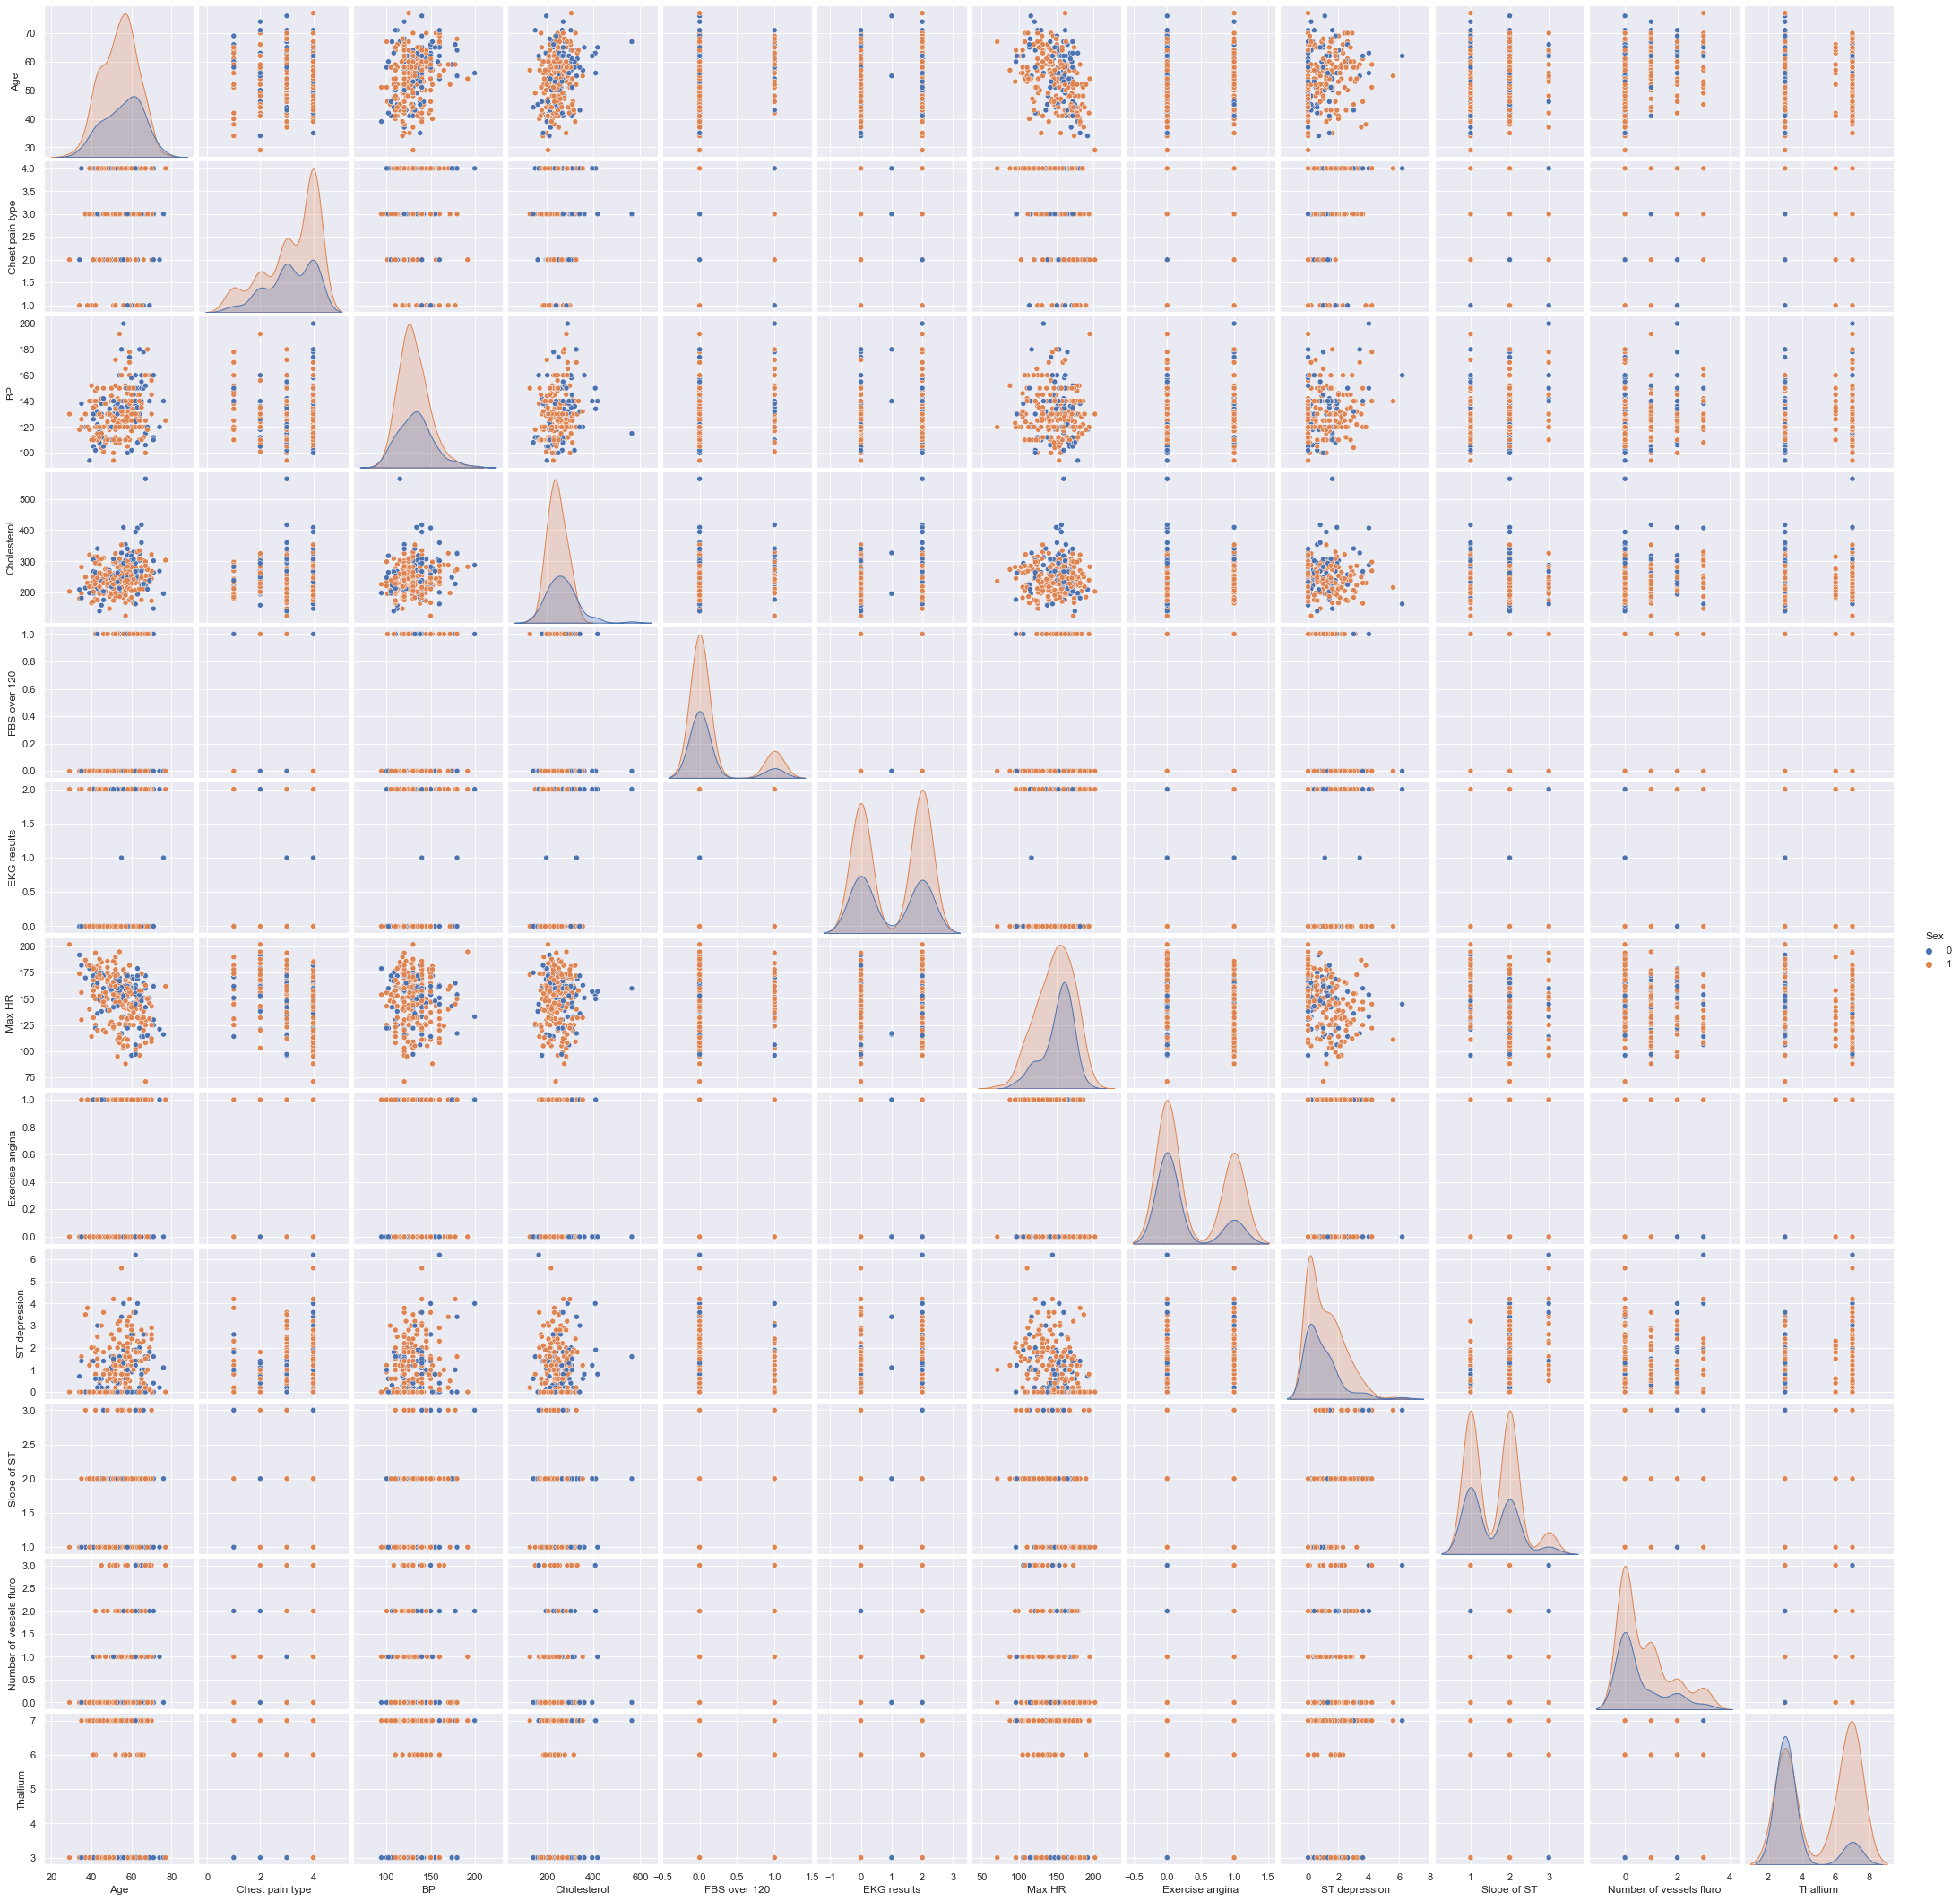

In [481]:
sns.pairplot(data, hue="Sex")

# MAPPING CLASS STRING TO NUMBERS

In [482]:
data['Heart Disease'] = data['Heart Disease'].map({'Absence': 0, 'Presence': 1}).astype(int)
print(data.head)

<bound method NDFrame.head of      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise

# SEGREGATE DATASET INTO X(INPUT/INDEPENDENT VARIABLES) AND Y(OUTPUT/DEPENDENT VARIABLES)

In [483]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [484]:
#SPLITING DATASET INTO TRAIN AND TEST
x = data.iloc[:, :-1:].values
y = data["Heart Disease"].values

In [485]:
x

array([[70.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  0.,  3., ...,  2.,  0.,  7.],
       [57.,  1.,  2., ...,  1.,  0.,  7.],
       ...,
       [56.,  0.,  2., ...,  2.,  0.,  3.],
       [57.,  1.,  4., ...,  2.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.]])

In [486]:
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

# SPLITING DATASET INTO TRAIN AND TEST

In [487]:
##FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 0.57200276  0.67225224 -0.2207054  ... -1.03256875 -0.71414284
  -0.91035053]
 [ 1.1387509   0.67225224 -0.2207054  ... -1.03256875 -0.71414284
  -0.91035053]
 [ 0.00525462  0.67225224  0.82074821 ...  0.64396761  0.34306862
   1.1567612 ]
 ...
 [ 1.1387509   0.67225224  0.82074821 ...  0.64396761  1.40028008
   0.63998327]
 [ 0.68535239  0.67225224  0.82074821 ...  0.64396761  1.40028008
   1.1567612 ]
 [ 0.91205165 -1.48753688  0.82074821 ...  0.64396761  2.45749155
  -0.91035053]]


In [488]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

In [489]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape, y_val.shape)

(151, 13) (151,)
(68, 13) (68,)
(51, 13) (51,)


# VALIDATING SOME ML ALGORITHMBY ITS ACCURACY- MODEL SCORE

In [490]:
def mape(y_true, y_pred):
       return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)
def adjR(y_true, y_pred,p):
    R2=r2_score(y_true,y_pred)
    n=10
    return 1-(1-R2)*(n-1)/(n-p-1)

                            LogisticRegression


In [491]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test)*100)

# Making Predictions
lr_predtr= lr.predict(x_train)
lr_predvl= lr.predict(x_val)
lr_predte= lr.predict(x_test)



86.76470588235294


In [492]:
# Performance on train data
lr_tr_R2score=r2_score(y_train, lr_predtr)
lr_tr_RMSE=np.sqrt(mean_squared_error(y_train, lr_predtr))
lr_tr_MSE=mean_squared_error(y_train, lr_predtr)
lr_tr_MAE=mean_absolute_error(y_train, lr_predtr)

# Performance on val data
lr_vl_R2score=r2_score(y_val, lr_predvl)
lr_vl_RMSE=np.sqrt(mean_squared_error(y_val, lr_predvl))
lr_vl_MSE=mean_squared_error(y_val, lr_predvl)
lr_vl_MAE=mean_absolute_error(y_val, lr_predvl)

# Performance on test data
lr_te_R2score=r2_score(y_test,lr_predte)
lr_te_RMSE=np.sqrt(mean_squared_error(y_test, lr_predte))
lr_te_MSE=mean_squared_error(y_test, lr_predte)
lr_te_MAE=mean_absolute_error(y_test, lr_predte)

model_LR=pd.DataFrame({'Algorithm':['Simple Linear Reg Model'],
                       'train Score':lr_tr_R2score,'RMSE_tr': lr_tr_RMSE, 'MSE_tr': lr_tr_MSE, 'MAE_tr': lr_tr_MAE,
                         
                        'Val Score':lr_vl_R2score,'RMSE_vl': lr_vl_RMSE, 'MSE_vl': lr_vl_MSE, 'MAE_vl': lr_vl_MAE,
                         
                      'test Score':lr_te_R2score,'RMSE_te': lr_te_RMSE, 'MSE_te': lr_te_MSE, 'MAE_te': lr_te_MAE,
                        })
model_LR

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,test Score,RMSE_te,MSE_te,MAE_te
0,Simple Linear Reg Model,0.575246,0.325515,0.10596,0.10596,0.259677,0.420084,0.176471,0.176471,0.453571,0.363803,0.132353,0.132353


                                                DecisionTreeClassifier

In [493]:
from sklearn.tree import DecisionTreeClassifier

In [494]:
DTF = DecisionTreeClassifier()
DTF.fit(x_train, y_train)
print(DTF.score(x_test, y_test)*100)

# Making Predictions
DTF_predtr= model.predict(x_train)
DTF_predvl= model.predict(x_val)
DTF_predte= model.predict(x_test)



76.47058823529412


In [495]:
# Performance on train data
DTF_tr_R2score=r2_score(y_train, lr_predtr)
DTF_tr_RMSE=np.sqrt(mean_squared_error(y_train, DTF_predtr))
DTF_tr_MSE=mean_squared_error(y_train, DTF_predtr)
DTF_tr_MAE=mean_absolute_error(y_train, DTF_predtr)

# Performance on val data
DTF_vl_R2score=r2_score(y_val, DTF_predvl)
DTF_vl_RMSE=np.sqrt(mean_squared_error(y_val, DTF_predvl))
DTF_vl_MSE=mean_squared_error(y_val, DTF_predvl)
DTF_vl_MAE=mean_absolute_error(y_val, DTF_predvl)

# Performance on test data
DTF_te_R2score=r2_score(y_test,DTF_predte)
DTF_te_RMSE=np.sqrt(mean_squared_error(y_test, DTF_predte))
DTF_te_MSE=mean_squared_error(y_test, DTF_predte)
DTF_te_MAE=mean_absolute_error(y_test, DTF_predte)

model_data=pd.DataFrame({'Algorithm':['DecisionTreeClassifier'],
                       'train Score':DTF_tr_R2score,'RMSE_tr': DTF_tr_RMSE, 'MSE_tr': DTF_tr_MSE, 'MAE_tr': DTF_tr_MAE,
                         
                        'Val Score':DTF_vl_R2score,'RMSE_vl': DTF_vl_RMSE, 'MSE_vl': DTF_vl_MSE, 'MAE_vl': DTF_vl_MAE,
                         
                      'test Score':DTF_te_R2score,'RMSE_te': DTF_te_RMSE, 'MSE_te': DTF_te_MSE, 'MAE_te': DTF_te_MAE,
                        })
model_comp = pd.concat([model_LR, model_data]).reset_index(drop=True)

model_comp

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,test Score,RMSE_te,MSE_te,MAE_te
0,Simple Linear Reg Model,0.575246,0.325515,0.10596,0.10596,0.259677,0.420084,0.176471,0.176471,0.453571,0.363803,0.132353,0.132353
1,DecisionTreeClassifier,0.575246,0.000000,0.00000,0.00000,-0.069355,0.504878,0.254902,0.254902,0.028571,0.485071,0.235294,0.235294


                                            Naive Bayes

In [496]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(x_train, y_train)
print(GB.score(x_test, y_test)*100)

# Making Predictions
NB_predtr= model.predict(x_train)
NB_predvl= model.predict(x_val)
NB_predte= model.predict(x_test)

77.94117647058823


In [497]:
# Performance on train data
NB_tr_R2score=r2_score(y_train, NB_predtr)
NB_tr_RMSE=np.sqrt(mean_squared_error(y_train, NB_predtr))
NB_tr_MSE=mean_squared_error(y_train, NB_predtr)
NB_tr_MAE=mean_absolute_error(y_train, NB_predtr)

# Performance on val data
NB_vl_R2score=r2_score(y_val, NB_predvl)
NB_vl_RMSE=np.sqrt(mean_squared_error(y_val, NB_predvl))
NB_vl_MSE=mean_squared_error(y_val, NB_predvl)
NB_vl_MAE=mean_absolute_error(y_val, NB_predvl)

# Performance on test data
NB_te_R2score=r2_score(y_test,NB_predte)
NB_te_RMSE=np.sqrt(mean_squared_error(y_test, NB_predte))
NB_te_MSE=mean_squared_error(y_test, NB_predte)
NB_te_MAE=mean_absolute_error(y_test, NB_predte)

model_NB=pd.DataFrame({'Algorithm':['Naive Bayes'],
                       'train Score':NB_tr_R2score,'RMSE_tr': NB_tr_RMSE, 'MSE_tr': NB_tr_MSE, 'MAE_tr': NB_tr_MAE,
                         
                        'Val Score':NB_vl_R2score,'RMSE_vl': NB_vl_RMSE, 'MSE_vl': NB_vl_MSE, 'MAE_vl': NB_vl_MAE,
                         
                      'test Score':NB_te_R2score,'RMSE_te': NB_te_RMSE, 'MSE_te': NB_te_MSE, 'MAE_te': NB_te_MAE,
                        })
model_comp = pd.concat([model_comp, model_NB]).reset_index(drop=True)

model_comp

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,test Score,RMSE_te,MSE_te,MAE_te
0,Simple Linear Reg Model,0.575246,0.325515,0.10596,0.10596,0.259677,0.420084,0.176471,0.176471,0.453571,0.363803,0.132353,0.132353
1,DecisionTreeClassifier,0.575246,0.000000,0.00000,0.00000,-0.069355,0.504878,0.254902,0.254902,0.028571,0.485071,0.235294,0.235294
2,Naive Bayes,1.000000,0.000000,0.00000,0.00000,-0.069355,0.504878,0.254902,0.254902,0.028571,0.485071,0.235294,0.235294


                                    SUPPORT VECTOR MACHINE

In [498]:
from sklearn import svm
SVM = svm.SVC(gamma=0.001)
SVM.fit(x_train,y_train)
print(SVM.score(x_test, y_test)*100)

# Making Predictions
SVM_predtr= model.predict(x_train)
SVM_predvl= model.predict(x_val)
SVM_predte= model.predict(x_test)

63.23529411764706


In [499]:
# Performance on train data
SVM_tr_R2score=r2_score(y_train, SVM_predtr)
SVM_tr_RMSE=np.sqrt(mean_squared_error(y_train, SVM_predtr))
SVM_tr_MSE=mean_squared_error(y_train, SVM_predtr)
SVM_tr_MAE=mean_absolute_error(y_train, SVM_predtr)

# Performance on val data
SVM_vl_R2score=r2_score(y_val, SVM_predvl)
SVM_vl_RMSE=np.sqrt(mean_squared_error(y_val, SVM_predvl))
SVM_vl_MSE=mean_squared_error(y_val, SVM_predvl)
SVM_vl_MAE=mean_absolute_error(y_val, SVM_predvl)

# Performance on test data
SVM_te_R2score=r2_score(y_test,SVM_predte)
SVM_te_RMSE=np.sqrt(mean_squared_error(y_test, SVM_predte))
SVM_te_MSE=mean_squared_error(y_test, SVM_predte)
SVM_te_MAE=mean_absolute_error(y_test, SVM_predte)

model_SVM=pd.DataFrame({'Algorithm':['support vector machine'],
                       'train Score':NB_tr_R2score,'RMSE_tr': NB_tr_RMSE, 'MSE_tr': NB_tr_MSE, 'MAE_tr': NB_tr_MAE,
                         
                        'Val Score':NB_vl_R2score,'RMSE_vl': NB_vl_RMSE, 'MSE_vl': NB_vl_MSE, 'MAE_vl': NB_vl_MAE,
                         
                      'test Score':NB_te_R2score,'RMSE_te': NB_te_RMSE, 'MSE_te': NB_te_MSE, 'MAE_te': NB_te_MAE,
                        })
model_comp = pd.concat([model_comp, model_SVM]).reset_index(drop=True)

model_comp

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,test Score,RMSE_te,MSE_te,MAE_te
0,Simple Linear Reg Model,0.575246,0.325515,0.10596,0.10596,0.259677,0.420084,0.176471,0.176471,0.453571,0.363803,0.132353,0.132353
1,DecisionTreeClassifier,0.575246,0.000000,0.00000,0.00000,-0.069355,0.504878,0.254902,0.254902,0.028571,0.485071,0.235294,0.235294
2,Naive Bayes,1.000000,0.000000,0.00000,0.00000,-0.069355,0.504878,0.254902,0.254902,0.028571,0.485071,0.235294,0.235294
3,support vector machine,1.000000,0.000000,0.00000,0.00000,-0.069355,0.504878,0.254902,0.254902,0.028571,0.485071,0.235294,0.235294


Final summary:
The Simple Linear Reg Model have performed well compared to that of DecisionTreeClassifier ,KNN,SVR models, Naive Bayes
The top key features that drive the price of the property are: 'Sex', 'Cholesterol', 'ST depression', 'Age', 'BP'

In [500]:
model_comp.to_csv("model_comparison.csv")

In [501]:
model_comp.columns

Index(['Algorithm', 'train Score', 'RMSE_tr', 'MSE_tr', 'MAE_tr', 'Val Score',
       'RMSE_vl', 'MSE_vl', 'MAE_vl', 'test Score', 'RMSE_te', 'MSE_te',
       'MAE_te'],
      dtype='object')